All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 335:
> This question uses the `Caravan` data set.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


sns.set()
%matplotlib inline

In [2]:
caravan = pd.read_csv('https://raw.githubusercontent.com'
                      '/dsnair/ISLR/master/data/csv/Caravan.csv')
caravan.head(3)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


> The data contains 5822 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy. Further information on the individual variables can be obtained at http://www.liacs.nl/~putten/library/cc2000/data.html 

There are a lot of variables.

* `ORIGIN`: train or test, as described above;
* `MOSTYPE`: Customer Subtype; see L0;
* `MAANTHUI`: Number of houses 1 - 10;
* `MGEMOMV`: Avg size household 1 - 6;
* `MGEMLEEF`: Avg age; see L1;
* `MOSHOOFD`: Customer main type; see L2.

**Percentages in each group, per postal code (see L3)**:

* `MGODRK`: Roman catholic;
* `MGODPR`: Protestant …;
* `MGODOV`: Other religion;
* `MGODGE`: No religion;
* `MRELGE`: Married;
* `MRELSA`: Living together;
* `MRELOV`: Other relation;
* `MFALLEEN`: Singles;
* `MFGEKIND`: Household without children;
* `MFWEKIND`: Household with children;
* `MOPLHOOG`: High level education;
* `MOPLMIDD`: Medium level education;
* `MOPLLAAG`: Lower level education;
* `MBERHOOG`: High status;
* `MBERZELF`: Entrepreneur;
* `MBERBOER`: Farmer;
* `MBERMIDD`: Middle management;
* `MBERARBG`: Skilled labourers;
* `MBERARBO`: Unskilled labourers;
* `MSKA`: Social class A;
* `MSKB1`: Social class B1;
* `MSKB2`: Social class B2;
* `MSKC`: Social class C;
* `MSKD`: Social class D;
* `MHHUUR`: Rented house;
* `MHKOOP`: Home owners;
* `MAUT1`: 1 car;
* `MAUT2`: 2 cars;
* `MAUT0`: No car;
* `MZFONDS`: National Health Service;
* `MZPART`: Private health insurance;
* `MINKM30`: Income < 30.000;
* `MINK3045`: Income 30-45.000;
* `MINK4575`: Income 45-75.000;
* `MINK7512`: Income 75-122.000;
* `MINK123M`: Income >123.000;
* `MINKGEM`: Average income;
* `MKOOPKLA`: Purchasing power class.

**Total number of variable in postal code (see L4):**

* `PWAPART`: Contribution private third party insurance;
* `PWABEDR`: Contribution third party insurance (firms) …;
* `PWALAND`: Contribution third party insurane (agriculture);
* `PPERSAUT`: Contribution car policies;
* `PBESAUT`: Contribution delivery van policies;
* `PMOTSCO`: Contribution motorcycle/scooter policies;
* `PVRAAUT`: Contribution lorry policies;
* `PAANHANG`: Contribution trailer policies;
* `PTRACTOR`: Contribution tractor policies;
* `PWERKT`: Contribution agricultural machines policies;
* `PBROM`: Contribution moped policies;
* `PLEVEN`: Contribution life insurances;
* `PPERSONG`: Contribution private accident insurance policies;
* `PGEZONG`: Contribution family accidents insurance policies;
* `PWAOREG`: Contribution disability insurance policies;
* `PBRAND`: Contribution fire policies;
* `PZEILPL`: Contribution surfboard policies;
* `PPLEZIER`: Contribution boat policies;
* `PFIETS`: Contribution bicycle policies;
* `PINBOED`: Contribution property insurance policies;
* `PBYSTAND`: Contribution social security insurance policies;
* `AWAPART`: Number of private third party insurance 1 - 12;
* `AWABEDR`: Number of third party insurance (firms) …;
* `AWALAND`: Number of third party insurance (agriculture);
* `APERSAUT`: Number of car policies;
* `ABESAUT`: Number of delivery van policies;
* `AMOTSCO`: Number of motorcycle/scooter policies;
* `AVRAAUT`: Number of lorry policies;
* `AAANHANG`: Number of trailer policies;
* `ATRACTOR`: Number of tractor policies;
* `AWERKT`: Number of agricultural machines policies;
* `ABROM`: Number of moped policies;
* `ALEVEN`: Number of life insurances;
* `APERSONG`: Number of private accident insurance policies;
* `AGEZONG`: Number of family accidents insurance policies;
* `AWAOREG`: Number of disability insurance policies;
* `ABRAND`: Number of fire policies;
* `AZEILPL`: Number of surfboard policies;
* `APLEZIER`: Number of boat policies;
* `AFIETS`: Number of bicycle policies;
* `AINBOED`: Number of property insurance policies;
* `ABYSTAND`: Number of social security insurance policies;
* `CARAVAN`: Number of mobile home policies 0 - 1.

**Keys (L1 - L4)**

**L0: Customer subtype**

* 1: High Income, expensive child;
* 2: Very Important Provincials;
* 3: High status seniors;
* 4: Affluent senior apartments;
* 5: Mixed seniors;
* 6: Career and childcare;
* 7: Dinki's (double income no kids);
* 8: Middle class families;
* 9: Modern, complete families;
* 10: Stable family;
* 11: Family starters;
* 12: Affluent young families;
* 13: Young all american family;
* 14: Junior cosmopolitan;
* 15: Senior cosmopolitans;
* 16: Students in apartments;
* 17: Fresh masters in the city;
* 18: Single youth;
* 19: Suburban youth;
* 20: Etnically diverse;
* 21: Young urban have-nots;
* 22: Mixed apartment dwellers;
* 23: Young and rising;
* 24: Young, low educated;
* 25: Young seniors in the city;
* 26: Own home elderly;
* 27: Seniors in apartments;
* 28: Residential elderly;
* 29: Porchless seniors: no front yard;
* 30: Religious elderly singles;
* 31: Low income catholics;
* 32: Mixed seniors;
* 33: Lower class large families;
* 34: Large family, employed child;
* 35: Village families;
* 36: Couples with teens 'Married with children';
* 37: Mixed small town dwellers;
* 38: Traditional families;
* 39: Large religous families;
* 40: Large family farms;
* 41: Mixed rurals.

**L1: average age keys**

* 1: 20-30 years;
* 2: 30-40 years;
* 3: 40-50 years;
* 4: 50-60 years;
* 5: 60-70 years;
* 6: 70-80 years.

**L2: customer main type keys:**

* 1: Successful hedonists
* 2: Driven Growers
* 3: Average Family
* 4: Career Loners
* 5: Living well
* 6: Cruising Seniors
* 7: Retired and Religeous
* 8: Family with grown ups
* 9: Conservative families
* 10: Farmers

**L3: percentage keys:**

* 0: 0%
* 1: 1 - 10%
* 2: 11 - 23%
* 3: 24 - 36%
* 4: 37 - 49%
* 5: 50 - 62%
* 6: 63 - 75%
* 7: 76 - 88%
* 8: 89 - 99%
* 9: 100%

**L4: total number keys:**

* 0: 0
* 1: 1 - 49
* 2: 50 - 99
* 3: 100 - 199
* 4: 200 - 499
* 5: 500 - 999
* 6: 1000 - 4999
* 7: 5000 - 9999
* 8: 10,000 - 19,999
* 9: >= 20,000


# (a)

From the textbook, p. 335:
> Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

In [3]:
x = pd.get_dummies(caravan.drop('Purchase', axis='columns')
                   , drop_first=True
)
y = caravan.Purchase

np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=1000)

# (b)

From the textbook, p. 335:
> Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [4]:
model_b = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01)
model_b.fit(x_train, y_train)
feature_importances = np.mean([
    tree.feature_importances_ for tree in model_b.estimators_
], axis=0)
imp_df = pd.DataFrame({'Importance' : feature_importances
                       ,'Feature' : x.columns.to_list()}
                      , index=x.columns
                     ).sort_values('Importance', ascending=False)

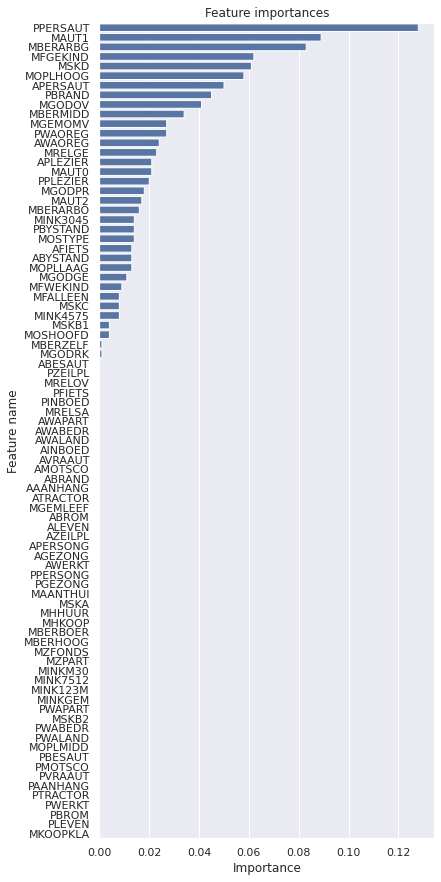

In [5]:
plt.figure(figsize=(6, 15))
sns.barplot(x="Importance"
            , y="Feature"
            , data=imp_df
            , label="Total"
            , color="b"
            , snap=False
            )
plt.title('Feature importances')
plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.show()

You can see, that, out of 86 predictors, only 26 have any importance.

# (c)

From the textbook, p. 335:
> Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one?

In [6]:
y_pred = np.where(model_b.predict_proba(x_test)[:, 1] > 0.2, 'Yes', 'No')
df = (pd.DataFrame(confusion_matrix(y_pred, y_test)
                   , columns=['No', 'Yes']
                   , index=['No', 'Yes']
                  ).loc[
                        ['Yes', 'No']
                        , ['Yes', 'No']
                       ]
                   .rename_axis('Prediction')
                   .rename_axis('Reality', axis='columns')
)
df

Reality,Yes,No
Prediction,,
Yes,289,4533
No,0,0


In [7]:
df.loc['Yes', 'Yes'] / df.loc['Yes', :].sum()

0.05993363749481543

This metric is called precision. Precision of 6% percent is *terrible*. You can also see that, at the probability threshold of 20%, the model predicts everything as 'Yes'. This way AdaBoostClassifier is worse than the null model that predicts 'No' for all points ('No' is the dominant class). The threshold is too low, in my opinion.

I've tweaked the threshold a little bit.

In [8]:
y_pred = np.where(model_b.predict_proba(x_test)[:, 1] > 0.455, 'Yes', 'No')
df = (pd.DataFrame(confusion_matrix(y_pred, y_test)
                   , columns=['No', 'Yes']
                   , index=['No', 'Yes']
                  ).loc[
                        ['Yes', 'No']
                        , ['Yes', 'No']
                       ]
                   .rename_axis('Prediction')
                   .rename_axis('Reality', axis='columns')
)
df

Reality,Yes,No
Prediction,,
Yes,55,202
No,234,4331


In [9]:
df.loc['Yes', 'Yes'] / df.loc['Yes', :].sum()

0.2140077821011673

> How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [10]:
model_c = KNeighborsClassifier()
model_c.fit(x_train, y_train)
y_pred_c = model_c.predict(x_test)
df = (pd.DataFrame(confusion_matrix(y_pred_c, y_test)
                   , columns=['No', 'Yes']
                   , index=['No', 'Yes']
                  ).loc[
                        ['Yes', 'No']
                        , ['Yes', 'No']
                       ]
                   .rename_axis('Prediction')
                   .rename_axis('Reality', axis='columns')
)
df

Reality,Yes,No
Prediction,,
Yes,9,14
No,280,4519


In [11]:
df.loc['Yes', 'Yes'] / df.loc['Yes', :].sum()

0.391304347826087

This model has better precision but worse recall.